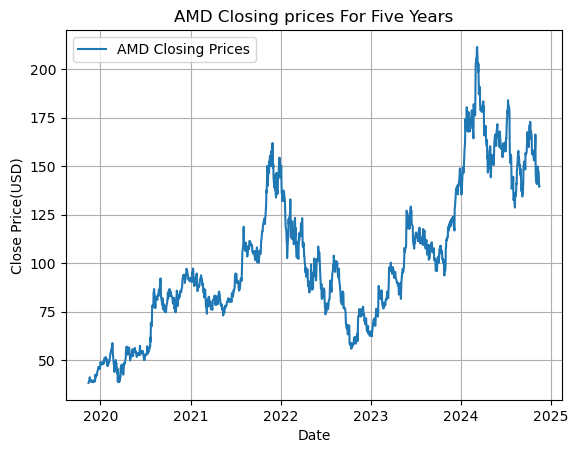

<Figure size 640x480 with 0 Axes>

In [17]:
#Visual of Data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 


#Fetch Data 
ticker = yf.Ticker('AMD')
dfAMD = ticker.history(period='5y')

dates = dfAMD.index.to_numpy()
closing_prices = dfAMD['Close'].to_numpy()

plt.plot(dates, closing_prices, label='AMD Closing Prices')
plt.title('AMD Closing prices For Five Years')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')
plt.grid(True)
plt.legend()
plt.show()

plt.savefig('AMD_Plot.png')

In [22]:
# Check for Stationary Uisng ADF Test 
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfAMD['Close'])

adf_statistic= result[0]
p_value = result[1]
critical_values = result[4]

print (f'ADF Statistic: {adf_statistic}')
print (f'p-value: {p_value}')
print ('\nCritical Values:')
for key, value in critical_values.items():
    print(f' {key}:{value}')


if result[1]<0.05:
    print("Data is Stationary")
else:
    print("Not Stationary")


    
#p-Value is greater than 0.05 we have to diiference it





ADF Statistic: -1.9290802524963382
p-value: 0.31850690281120553

Critical Values:
 1%:-3.4355588184378574
 5%:-2.8638402312881497
 10%:-2.5679946684494275
Not Stationary


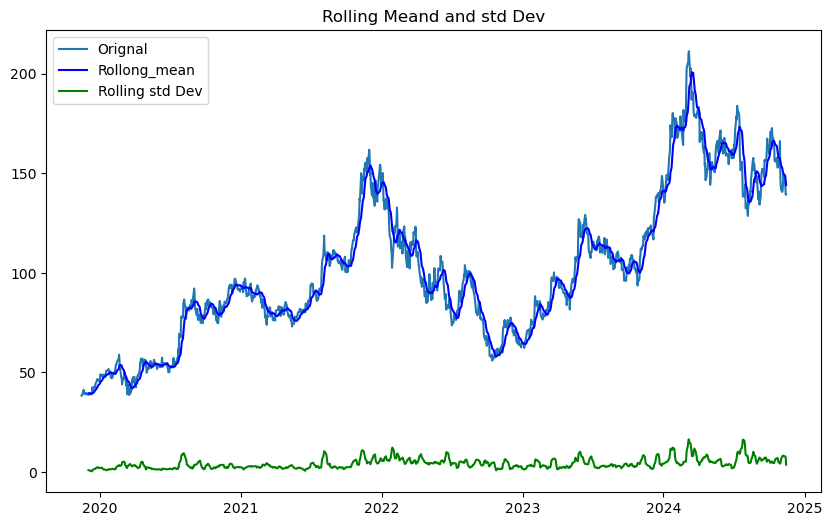

In [28]:
#visual inspection to check stationary 
#using Rolling mean & rolling standard deviation (data will not be constant with high & lows) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
ticker= yf.Ticker('AMD')
dfAMD= ticker.history(period='5y')
rolling_mean = dfAMD['Close'].rolling(window=12).mean()
rolling_std = dfAMD['Close'].rolling(window =12).std()

plt.figure(figsize=(10,6))
plt.plot(dfAMD['Close'], label='Orignal')
plt.plot(rolling_mean, label='Rollong_mean', color='blue')
plt.plot(rolling_std, label='Rolling std Dev', color='green')
plt.legend()
plt.title("Rolling Mean and std Dev")
plt.show()


           

In [ ]:
#spliting data Training & Test Data 





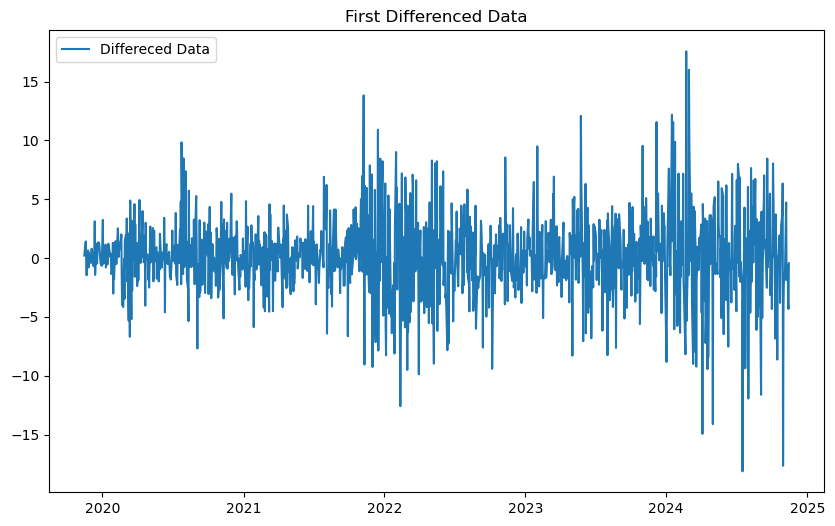

ADF Statistic: -36.55750307913744
p-value: 0.0
Critical Values: {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}
Data is Stationary
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6682.678, Time=1.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6679.813, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6680.614, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6680.600, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6682.580, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6681.134, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.135 seconds
Auto ARIMA Model Summart:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:                        SARIMAX   Log Likelihood               -3338.907
Date:                Thu, 14 Nov 2024   AIC              

In [44]:
#visual inspection to check stationary 
#using Rolling mean & rolling standard deviation (data will not be constant with high & lows) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

ticker= yf.Ticker('AMD')
dfAMD= ticker.history(period='5y')

#first Differencing
dfAMD['diff'] = dfAMD['Close'].diff()

plt.figure(figsize=(10,6))
plt.plot(dfAMD['diff'], label='Differeced Data')
plt.title('First Differenced Data')
plt.legend()
plt.show()

#ADF Test
adf_result_diff = adfuller(dfAMD['diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
print(f'Critical Values: {adf_result_diff[4]}')

if adf_result_diff[1] <0.05:
    print("Data is Stationary")
else:
    print("Data is not Stationary")

auto_model = pm.auto_arima(dfAMD['diff'].dropna(), seasonal=False , trace=True, stepwise=True)

print("Auto ARIMA Model Summart:")
print(auto_model.summary())



           

In [42]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:0031m11.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [35]:
from statsmodel.tsa.stattols import adfuller
adf_result_diff = adfuller(dfAMD['diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
print(f'Critical Values: {adf_result_diff[4]}')

if adf_result_diff[1]<0.05:
    print("Data is Stationary")
else:
    print("Data is not stationary")
automodel = pm.auto_arism(dfAMD['diff']dropna(), seasonal= False, trace=True, stepwise=True)
print("Auto Arima Model Summary:")
print(auto_model.summary())


SyntaxError: invalid syntax. Perhaps you forgot a comma? (748497163.py, line 12)